In [2]:
%matplotlib inline
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())))

from tools import utils
from data import goes16s3

import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import os
from PIL import Image


In [3]:
dayofyear = 283
year = 2018
n_channels = 3

In [13]:
noaa = goes16s3.NOAAGOESS3(channels=range(1,n_channels+1), product='ABI-L1b-RadC')
files = noaa.local_files()

I0files = files.loc[year, dayofyear, 18, 2].values[0,:n_channels]
I1files = files.loc[year, dayofyear, 18, 2+15].values[0,:n_channels]

print(I1)
I0 = goes16s3._open_and_merge_2km(I0files)
I1 = goes16s3._open_and_merge_2km(I1files)

<xarray.DataArray (band: 3, y: 1500, x: 2500)>
array([[[     nan,      nan, ..., 0.247475, 0.256731],
        [     nan,      nan, ..., 0.271277, 0.26731 ],
        ...,
        [0.191937, 0.095406, ..., 0.082183, 0.084827],
        [0.092761, 0.084827, ..., 0.054413, 0.050446]],

       [[     nan,      nan, ..., 0.229065, 0.232125],
        [     nan,      nan, ..., 0.272519, 0.263338],
        ...,
        [0.141544, 0.080341, ..., 0.033827, 0.052187],
        [0.035051, 0.039029, ..., 0.031684, 0.024952]],

       [[     nan,      nan, ..., 0.269377, 0.276688],
        [     nan,      nan, ..., 0.305932, 0.294966],
        ...,
        [0.181643, 0.047605, ..., 0.073194, 0.086598],
        [0.045168, 0.037857, ..., 0.030546, 0.028109]]], dtype=float32)
Coordinates:
  * y        (y) float64 0.1282 0.1282 0.1281 0.1281 ... 0.04442 0.04437 0.04431
  * x        (x) float64 -0.1013 -0.1013 -0.1012 ... 0.03846 0.03851 0.03857
  * band     (band) int64 1 2 3


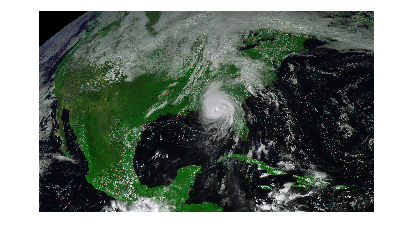

In [5]:
rgb = np.transpose(radgbr.values[[1,2,0]], (1,2,0))
plt.imshow(rgb, vmin=0.0, vmax=1.)
plt.axis('off')
plt.show()

In [11]:
from tools import inference_tools

model_path = '../saved-models/5Min-%iChannels/' % n_channels
flownet, interpnet, warper = inference_tools.load_models(n_channels, model_path, False)

loading checkpoint ../saved-models/5Min-3Channels/checkpoint.flownet.pth.tar
=> loaded checkpoint '../saved-models/5Min-3Channels/checkpoint.flownet.pth.tar' (epoch 19)
